In [1]:
#Step 1: Install Required Libraries
!pip install pgmpy pandas matplotlib seaborn networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00


In [3]:
#Step 2: Dataset Preparation
import pandas as pd
import numpy as np

# Generate a synthetic dataset
np.random.seed(42)
num_students = 1000

data = {
    "Student_ID": range(1, num_students + 1),
    "Hours_Studied": np.random.randint(1, 20, num_students),
    "Prior_Knowledge": np.random.choice([0, 1], num_students, p=[0.4, 0.6]),
    "Learning_Method": np.random.choice(["Video", "Text", "Interactive"], num_students),
    "Motivation": np.random.normal(0.5, 0.15, num_students),
    "Test_Score": np.random.randint(50, 100, num_students),
    "Course_Completion": np.random.choice([0, 1], num_students, p=[0.3, 0.7])
}

df = pd.DataFrame(data)
df["Engagement_Score"] = df["Hours_Studied"] * df["Motivation"]
df.head()


,Student_ID,Hours_Studied,Prior_Knowledge,Learning_Method,Motivation,Test_Score,Course_Completion,Engagement_Score
0,1,7,0,Interactive,0.376964,91,1,2.638747
1,2,15,1,Interactive,0.496396,91,0,7.445937
2,3,11,1,Interactive,0.253960,70,1,2.793560
3,4,8,0,Interactive,0.255116,64,1,2.040930
4,5,7,0,Video,0.471343,66,1,3.299400


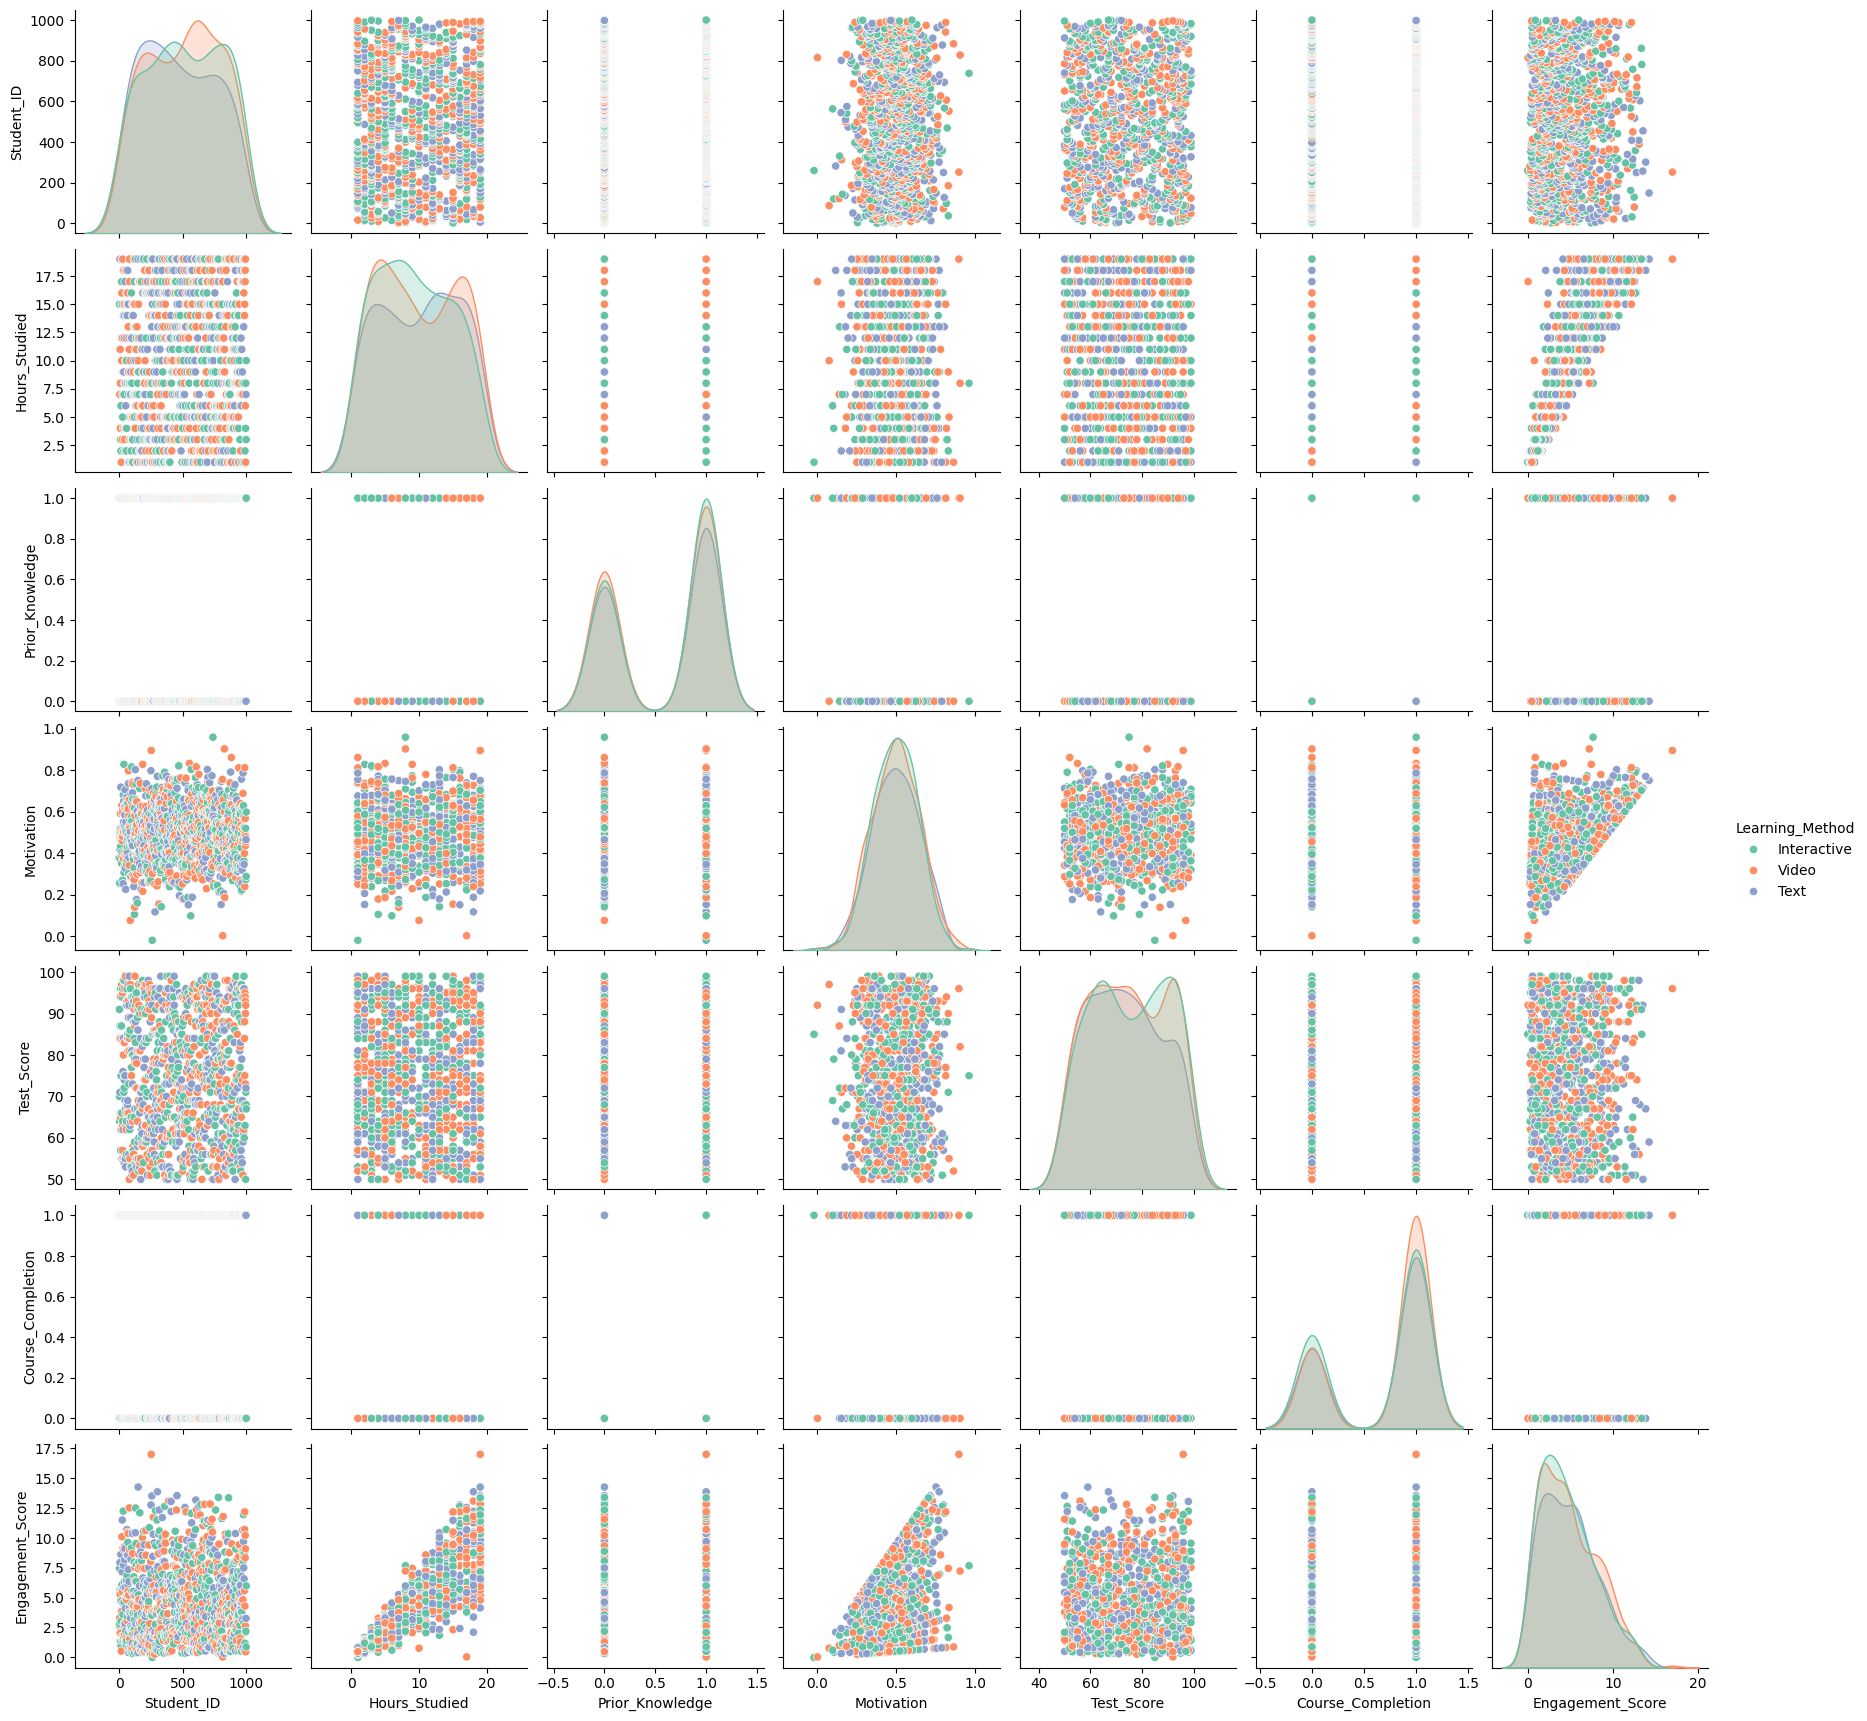

In [4]:
#Step 3: Visualize the Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(df, hue="Learning_Method", diag_kind="kde", palette="Set2")
plt.show()


In [5]:
#Step 4: Build the Bayesian Network
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Define the Bayesian Network structure
model = BayesianNetwork([
    ("Prior_Knowledge", "Test_Score"),
    ("Hours_Studied", "Test_Score"),
    ("Motivation", "Engagement_Score"),
    ("Engagement_Score", "Test_Score"),
    ("Test_Score", "Course_Completion"),
    ("Learning_Method", "Engagement_Score")
])

# Fit the model with Maximum Likelihood Estimation
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Display the structure
print("Nodes:", model.nodes())
print("Edges:", model.edges())


Nodes: ['Prior_Knowledge', 'Test_Score', 'Hours_Studied', 'Motivation', 'Engagement_Score', 'Course_Completion', 'Learning_Method']
Edges: [('Prior_Knowledge', 'Test_Score'), ('Test_Score', 'Course_Completion'), ('Hours_Studied', 'Test_Score'), ('Motivation', 'Engagement_Score'), ('Engagement_Score', 'Test_Score'), ('Learning_Method', 'Engagement_Score')]


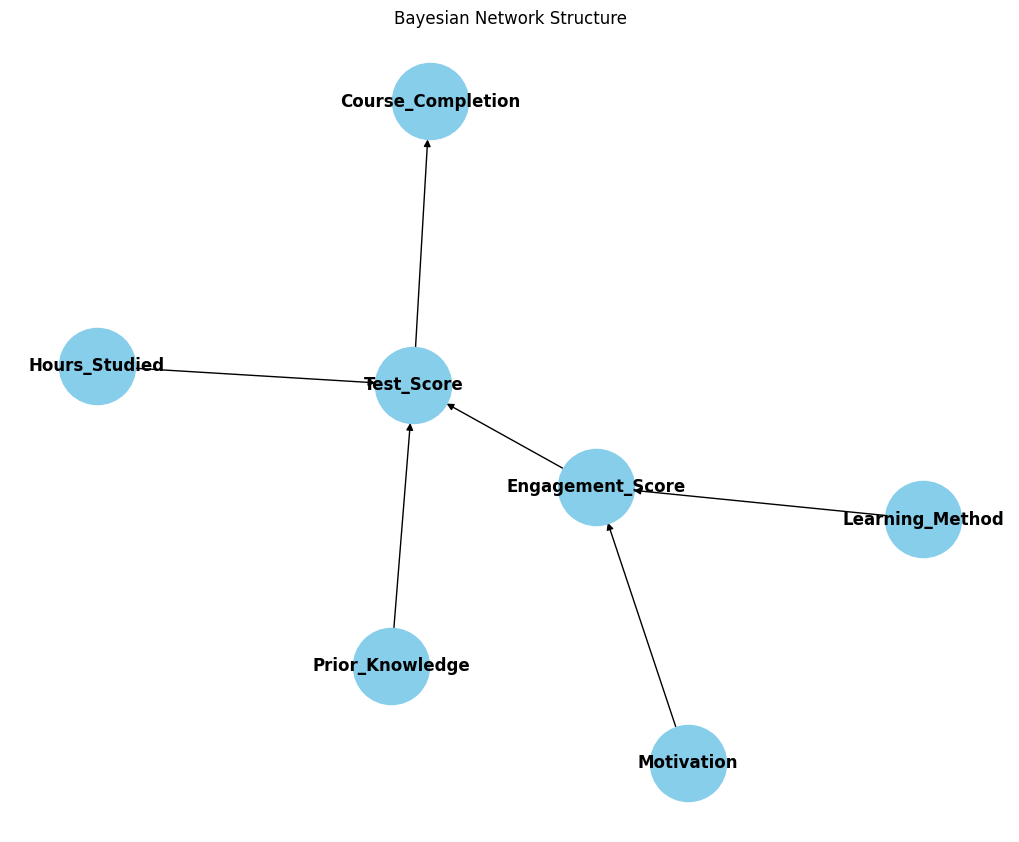

In [10]:
#Step 5: Visualize the Causal Graph
import networkx as nx
import matplotlib.pyplot as plt

# Convert the pgmpy model into a networkx DiGraph (Directed Graph)
nx_graph = nx.DiGraph()

# Add edges from the Bayesian Network
nx_graph.add_edges_from(model.edges())

# Visualize the Bayesian Network using networkx
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, with_labels=True, node_color='skyblue', node_size=3000, font_size=12, font_weight='bold')
plt.title("Bayesian Network Structure")
plt.show()




In [11]:
#Step 6: Perform Causal Inference
# Perform inference
inference = VariableElimination(model)

# Query the probability of course completion given test score
prob_course_completion = inference.query(variables=["Course_Completion"], evidence={"Test_Score": 80})
print(prob_course_completion)

# Simulate intervention: What if students studied 15 hours?
intervention = inference.query(variables=["Test_Score"], evidence={"Hours_Studied": 15})
print(intervention)


+----------------------+--------------------------+
| Course_Completion    |   phi(Course_Completion) |
+======================+==========================+
| Course_Completion(0) |                   0.2222 |
+----------------------+--------------------------+
| Course_Completion(1) |                   0.7778 |
+----------------------+--------------------------+
+----------------+-------------------+
| Test_Score     |   phi(Test_Score) |
+================+===================+
| Test_Score(50) |            0.0200 |
+----------------+-------------------+
| Test_Score(51) |            0.0194 |
+----------------+-------------------+
| Test_Score(52) |            0.0200 |
+----------------+-------------------+
| Test_Score(53) |            0.0208 |
+----------------+-------------------+
| Test_Score(54) |            0.0194 |
+----------------+-------------------+
| Test_Score(55) |            0.0202 |
+----------------+-------------------+
| Test_Score(56) |            0.0206 |
+-----------

In [12]:
#Step 7: Generate Dynamic Recommendations
# Recommendation based on Bayesian Inference
def recommend_learning_path(student_data):
    if student_data["Prior_Knowledge"] == 0 and student_data["Motivation"] < 0.5:
        return "Interactive"
    elif student_data["Test_Score"] < 70:
        return "Video"
    else:
        return "Text"

df["Recommended_Method"] = df.apply(recommend_learning_path, axis=1)
print(df[["Student_ID", "Recommended_Method"]].head())


   Student_ID Recommended_Method
0           1        Interactive
1           2               Text
2           3               Text
3           4        Interactive
4           5        Interactive


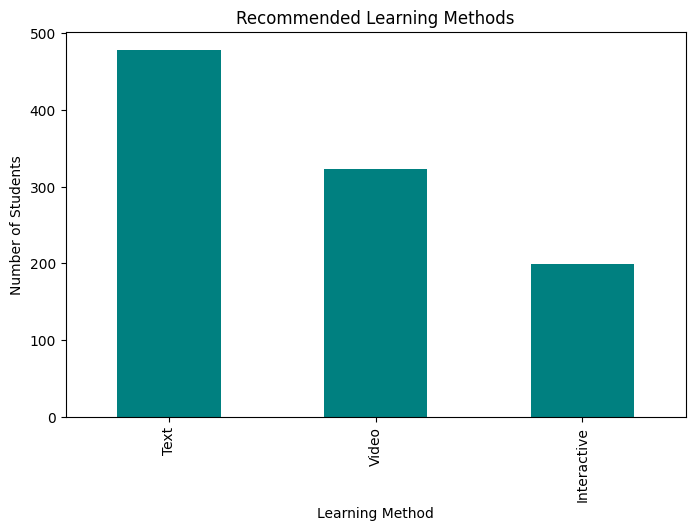

In [13]:
#Step 8: Visualize Recommendations
# Bar chart of recommended methods
recommendation_summary = df["Recommended_Method"].value_counts()
recommendation_summary.plot(kind="bar", color="teal", figsize=(8, 5))
plt.title("Recommended Learning Methods")
plt.xlabel("Learning Method")
plt.ylabel("Number of Students")
plt.show()


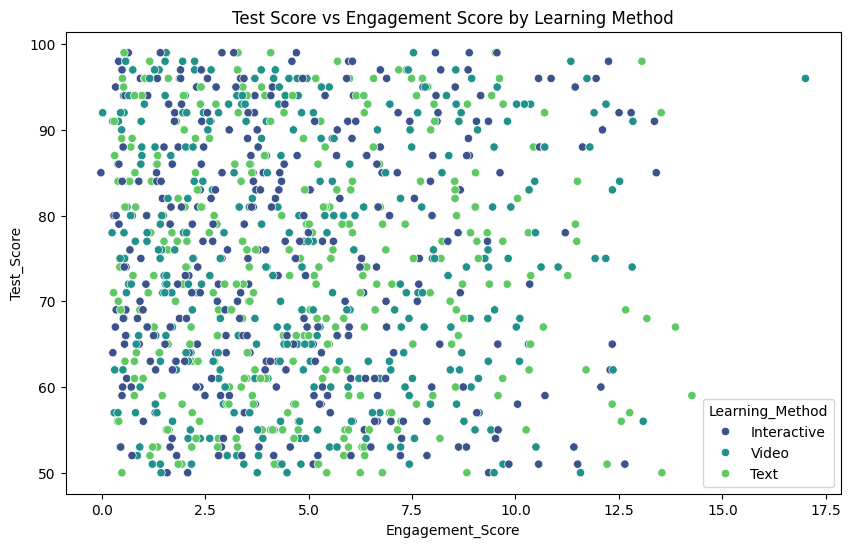

In [14]:
#Step 9: Showcase Advanced Insights
# Advanced visualization: Test Score distribution by Engagement Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Engagement_Score", y="Test_Score", hue="Learning_Method", palette="viridis")
plt.title("Test Score vs Engagement Score by Learning Method")
plt.show()


Accuracy: 0.7033
Precision: 0.7033
Recall: 1.0000
F1-Score: 0.8258
AUC-ROC: 0.5407


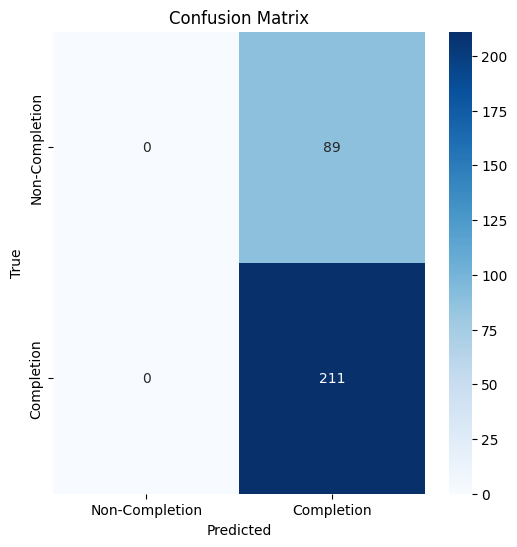

In [15]:
#Step 10: Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

# Create a classifier (logistic regression, for simplicity)
from sklearn.linear_model import LogisticRegression

# Prepare the data for training
X = df[['Hours_Studied', 'Prior_Knowledge', 'Learning_Method', 'Motivation']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy variables
y = df['Course_Completion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Completion', 'Completion'], yticklabels=['Non-Completion', 'Completion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
#Step 11: Cross-Validation
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.69  0.69  0.69  0.685 0.685]
Mean cross-validation accuracy: 0.6880


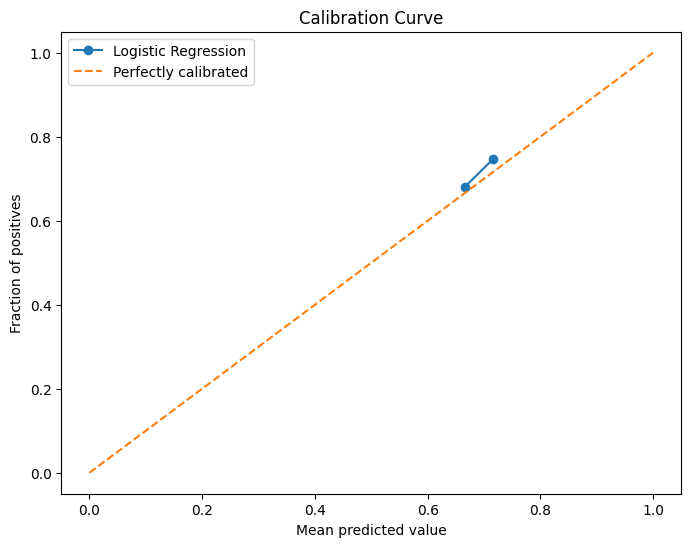

In [18]:
#Step 12: Calibration Curve
from sklearn.calibration import calibration_curve

# Get the predicted probabilities for the positive class
probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probabilities, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
